# **Using my YOLO model locally on VSCODE**
This notebook explains the code steps for using your YOLO trained model and testing on local device, preferably in VSCODE IDE for inferencing.
You can also use it withou having to use Roboflow platform

## **Import Libraries**
Install all the neccessary libraries and import them

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install cv

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import torch as th

In [4]:
import torch
from PIL import Image
import time

In [5]:
# Function to load the model
def load_model(model_path):
    model = torch.load(model_path, weights_only=False)
    model.eval()  # Set the model to evaluation mode
    return model

In [6]:
# Function to preprocess the image before feeding it to the model
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))  # Resize to the model's expected input size
    img = np.array(img).astype(np.float32) / 255.0  # Convert to a NumPy array and normalize
    img = np.transpose(img, (2, 0, 1))  # Transpose the image to (channels, height, width)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return torch.tensor(img)


In [7]:
%pip install ultralytics



Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch

In [9]:
import os

In [10]:
# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
# Path to your model
model_path = "C:/Users/dolap/Downloads/best.pt"  # Use this on Windows


In [12]:
# Load the model
def load_model(model_path):
    model = torch.load(model_path, map_location=device)
    model.eval()
    return model.to(device)

## To plot image with segmentation

In [30]:
from ultralytics import YOLO

# Path to your model in Downloads folder
model_path = "C:/Users/dolap/Downloads/best.pt"  # Update with your correct model path

# Load the YOLOv8 model
model = YOLO(model_path)

# Run inference on an image
image_path = "C:/Users/dolap/Downloads/cyst.jpg"  # Update with your reference image path
results = model(image_path)

# Show results
results[0].show()



image 1/1 C:\Users\dolap\Downloads\cyst.jpg: 448x640 1 Posidonia oceanica, 442.3ms
Speed: 33.7ms preprocess, 442.3ms inference, 37.1ms postprocess per image at shape (1, 3, 448, 640)


In [14]:
# Save annotated image to Downloads
# results[0].save(filename="C:/Users/dolap/Downloads/annotated_output.jpg")
# print("✅ Saved annotated image to Downloads")


To print the details from the label classes and boxes information

In [29]:
boxes = results[0].boxes  # Bounding box coordinates
labels = results[0].names  # Class names
print(boxes)  # Print the coordinates
print(labels)  # Print the detected class names

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.9323])
data: tensor([[8.4656e-02, 9.9000e+01, 6.3972e+02, 4.2376e+02, 9.3235e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (426, 640)
shape: torch.Size([1, 6])
xywh: tensor([[319.9011, 261.3805, 639.6328, 324.7614]])
xywhn: tensor([[0.4998, 0.6136, 0.9994, 0.7624]])
xyxy: tensor([[8.4656e-02, 9.9000e+01, 6.3972e+02, 4.2376e+02]])
xyxyn: tensor([[1.3227e-04, 2.3239e-01, 9.9956e-01, 9.9474e-01]])
{0: 'Cystoseira sp', 1: 'Posidonia oceanica', 2: 'Sargassum vulgare'}


To print full details of the detected box:

In [35]:
# Iterate through detected boxes
for box, conf, cls in zip(boxes.xyxy, boxes.conf, boxes.cls):
    class_name = labels[int(cls)]  # Get class name based on the class ID
    print(f"Class: {class_name}, Confidence level: {conf:.2f}")
    print(f"Bounding Box (xyxy): {box}")


Class: Posidonia oceanica, Confidence level: 0.93
Bounding Box (xyxy): tensor([8.4656e-02, 9.9000e+01, 6.3972e+02, 4.2376e+02])


In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


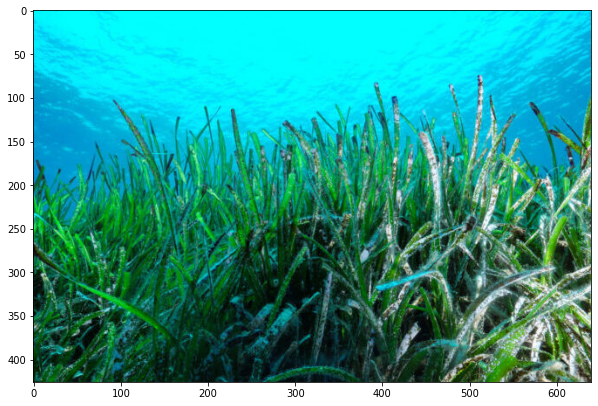

In [31]:
# Path to your image
image_path = "C:/Users/dolap/Downloads/cyst.jpg"

# Load the image
img = Image.open(image_path)

# Load the image in RGB mode (just in case it's not in RGB mode)
img = Image.open(image_path).convert("RGB")

# Get the bounding box data (xyxy format: [x1, y1, x2, y2])
x1, y1, x2, y2 = results[0].boxes.xyxy[0].tolist()

# Confidence and class label
confidence = results[0].boxes.conf[0].item()  # Confidence score
class_id = int(results[0].boxes.cls[0].item())  # Class ID
class_name = results[0].names[class_id]  # Get the class name from the index

# Plot the image
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)

## To plot the image with bounding box

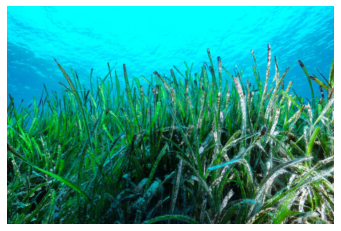

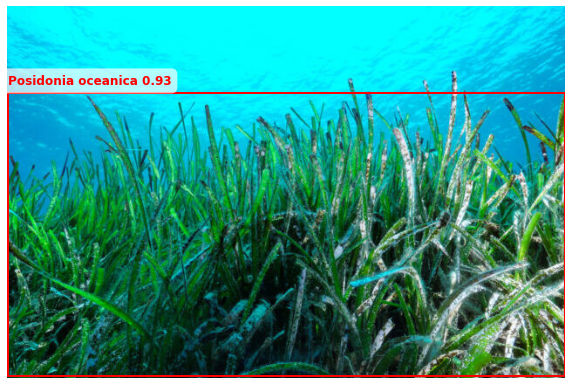

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Path to your image
image_path = "C:/Users/dolap/Downloads/cyst.jpg"

# Load the image and convert it to RGB (just in case it's grayscale or another format)
img = Image.open(image_path).convert("RGB")

# Display the raw image first to ensure it's loaded correctly
plt.imshow(img)
plt.axis('off')
plt.show()  # This step checks if the image is showing correctly

# Get the bounding box data (xyxy format: [x1, y1, x2, y2])
x1, y1, x2, y2 = results[0].boxes.xyxy[0].tolist()

# Confidence and class label
confidence = results[0].boxes.conf[0].item()  # Confidence score
class_id = int(results[0].boxes.cls[0].item())  # Class ID
class_name = results[0].names[class_id]  # Get the class name from the index

# Plot the image with the bounding box
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)  # Display the image in RGB mode

# Create a Rectangle patch with bounding box info
rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                         linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the image
ax.add_patch(rect)

# Annotate with class label and confidence
ax.text(x1, y1 - 10, f"{class_name} {confidence:.2f}", 
        color='red', fontsize=12, weight='bold', 
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Display the result
plt.axis('off')
plt.show()
